In [1]:
# 패키지 참조
import sys
from matplotlib import pyplot as plt
from pandas import read_excel
import seaborn as sb
import folium
from os import path, mkdir

In [2]:
# 데이터 불러오기
origin = read_excel("Excel Data/복지관_정보_위도경도.xlsx", index_col="시설명")
origin

,소재지,위도,경도
시설명,,,
영명보육원,세종특별자치시 연서면 월성로 239,36.588128,127.274352
아동보호전문기관,세종특별자치시 새롬로 14 새롬복지센터 2층,36.485977,127.256447
세종중앙 지역아동센터,세종특별자치시 조치원읍 장안길 97-7(2층),36.485943,127.256491
욱일 지역아동센터,세종특별자치시 조치원읍 충현로 159 욱일상가 404호,36.602953,127.293083
세종삼육 지역아동센터,세종특별자치시 조치원읍 새내14길 32,36.603169,127.299493
...,...,...,...
종촌종합복지센터 노인주간보호센터,"세종특별자치시 도움1로 116, 3(종촌동)",36.502764,127.246462
행복요양센터,세종특별자치시 연기면 수왕로 305-69,36.538328,127.242014
참사랑노인복지센터,"세종특별자치시 조치원읍 충현로 27, 2층",36.591610,127.298538


In [3]:
# 행정구만 따로 추출하기 위해 소재지 컬럼만 가져오기
origin['소재지']

시설명
영명보육원                           세종특별자치시 연서면 월성로 239
아동보호전문기관                   세종특별자치시 새롬로 14 새롬복지센터 2층
세종중앙 지역아동센터               세종특별자치시 조치원읍 장안길 97-7(2층)
욱일 지역아동센터            세종특별자치시 조치원읍 충현로 159 욱일상가 404호
세종삼육 지역아동센터                   세종특별자치시 조치원읍 새내14길 32
                                  ...              
종촌종합복지센터 노인주간보호센터          세종특별자치시 도움1로 116, 3(종촌동)
행복요양센터                       세종특별자치시 연기면 수왕로 305-69
참사랑노인복지센터                   세종특별자치시 조치원읍 충현로 27, 2층
조약돌요양복지센터                   세종특별자치시 장군면 장척로 408, 2층
래하임시니어복지센터                   세종특별자치시 금남면 용포1길 7, 1층
Name: 소재지, Length: 113, dtype: object

In [4]:
# 공백마다 split
addr_split = origin['소재지'].str.split(' ')
addr_split

시설명
영명보육원                             [세종특별자치시, 연서면, 월성로, 239]
아동보호전문기관                    [세종특별자치시, 새롬로, 14, 새롬복지센터, 2층]
세종중앙 지역아동센터                 [세종특별자치시, 조치원읍, 장안길, 97-7(2층)]
욱일 지역아동센터            [세종특별자치시, 조치원읍, 충현로, 159, 욱일상가, 404호]
세종삼육 지역아동센터                     [세종특별자치시, 조치원읍, 새내14길, 32]
                                     ...                  
종촌종합복지센터 노인주간보호센터            [세종특별자치시, 도움1로, 116,, 3(종촌동)]
행복요양센터                         [세종특별자치시, 연기면, 수왕로, 305-69]
참사랑노인복지센터                    [세종특별자치시, 조치원읍, 충현로, 27,, 2층]
조약돌요양복지센터                    [세종특별자치시, 장군면, 장척로, 408,, 2층]
래하임시니어복지센터                    [세종특별자치시, 금남면, 용포1길, 7,, 1층]
Name: 소재지, Length: 113, dtype: object

In [5]:
# 공백마다 split한 후 2번째 인덱스만 추출
origin['행정구역'] = addr_split.str.get(1)
origin1 = origin
origin1

,소재지,위도,경도,행정구역
시설명,,,,
영명보육원,세종특별자치시 연서면 월성로 239,36.588128,127.274352,연서면
아동보호전문기관,세종특별자치시 새롬로 14 새롬복지센터 2층,36.485977,127.256447,새롬로
세종중앙 지역아동센터,세종특별자치시 조치원읍 장안길 97-7(2층),36.485943,127.256491,조치원읍
욱일 지역아동센터,세종특별자치시 조치원읍 충현로 159 욱일상가 404호,36.602953,127.293083,조치원읍
세종삼육 지역아동센터,세종특별자치시 조치원읍 새내14길 32,36.603169,127.299493,조치원읍
...,...,...,...,...
종촌종합복지센터 노인주간보호센터,"세종특별자치시 도움1로 116, 3(종촌동)",36.502764,127.246462,도움1로
행복요양센터,세종특별자치시 연기면 수왕로 305-69,36.538328,127.242014,연기면
참사랑노인복지센터,"세종특별자치시 조치원읍 충현로 27, 2층",36.591610,127.298538,조치원읍


In [6]:
origin1['행정구역'].value_counts()

행정구역
조치원읍           36
한누리대로          11
연서면            10
전동면             7
전의면             6
보듬3로            5
도움1로            5
금남면             5
도움3로            4
연기면             3
장군면             2
부강면             2
마음로             2
새롬로             2
세종로1234-12,     2
새롬중앙로62-15,     2
호려울로            2
보람로             1
보듬4로            1
대평로             1
다정남3로           1
새롬중앙로           1
대평1길            1
연동면             1
Name: count, dtype: int64

In [7]:
plt.rcParams["font.family"] = 'Malgun Gothic'
plt.rcParams["font.size"] = 10
plt.rcParams["figure.figsize"] = (5, 5)
plt.rcParams["axes.unicode_minus"] = False

c:\Users\kiman\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


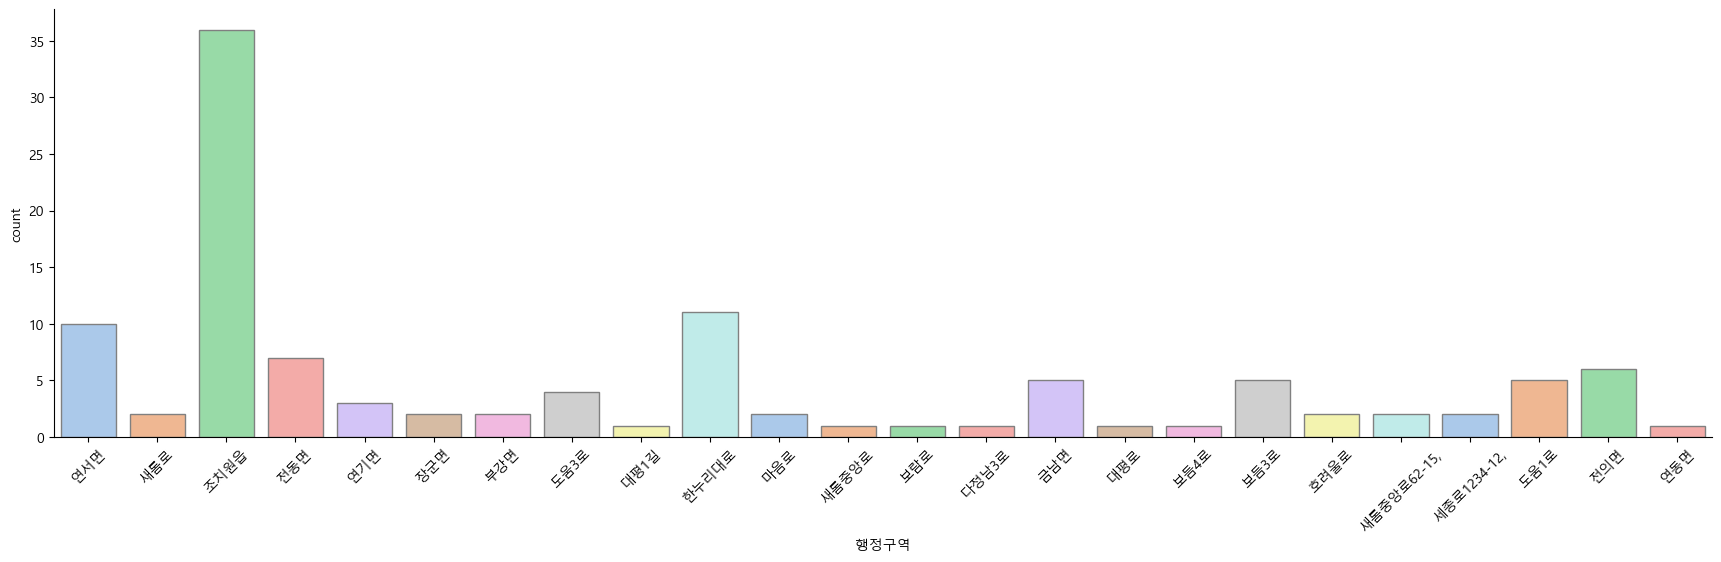

In [8]:

g = sb.catplot(data = origin1,
               x = '행정구역',        # 집단을 구분하는 기준
               kind = 'count',      # 그래프 종류
               palette='pastel',    # 색상표 지정
               edgecolor = '0.5'    # 막대 테두리 색상 투명도 지정(0=불투명 ~ 1=투명, ex:0.5 = 반투명)
               )
g.set_xticklabels(rotation=45)
sb.set(style="whitegrid")
g.fig.set_figwidth(20)
g.fig.set_figheight(5)


#### Folium 시각화

In [9]:
xlsx = read_excel("Excel Data/복지관_정보_위도경도.xlsx")
xlsx

,시설명,소재지,위도,경도
0,영명보육원,세종특별자치시 연서면 월성로 239,36.588128,127.274352
1,아동보호전문기관,세종특별자치시 새롬로 14 새롬복지센터 2층,36.485977,127.256447
2,세종중앙 지역아동센터,세종특별자치시 조치원읍 장안길 97-7(2층),36.485943,127.256491
3,욱일 지역아동센터,세종특별자치시 조치원읍 충현로 159 욱일상가 404호,36.602953,127.293083
4,세종삼육 지역아동센터,세종특별자치시 조치원읍 새내14길 32,36.603169,127.299493
...,...,...,...,...
108,종촌종합복지센터 노인주간보호센터,"세종특별자치시 도움1로 116, 3(종촌동)",36.502764,127.246462
109,행복요양센터,세종특별자치시 연기면 수왕로 305-69,36.538328,127.242014
110,참사랑노인복지센터,"세종특별자치시 조치원읍 충현로 27, 2층",36.591610,127.298538
111,조약돌요양복지센터,"세종특별자치시 장군면 장척로 408, 2층",36.497299,127.205965


#### 사용할 필드만 추출

In [10]:
df =  xlsx.filter(['시설명', '소재지', '위도', '경도'])
df

,시설명,소재지,위도,경도
0,영명보육원,세종특별자치시 연서면 월성로 239,36.588128,127.274352
1,아동보호전문기관,세종특별자치시 새롬로 14 새롬복지센터 2층,36.485977,127.256447
2,세종중앙 지역아동센터,세종특별자치시 조치원읍 장안길 97-7(2층),36.485943,127.256491
3,욱일 지역아동센터,세종특별자치시 조치원읍 충현로 159 욱일상가 404호,36.602953,127.293083
4,세종삼육 지역아동센터,세종특별자치시 조치원읍 새내14길 32,36.603169,127.299493
...,...,...,...,...
108,종촌종합복지센터 노인주간보호센터,"세종특별자치시 도움1로 116, 3(종촌동)",36.502764,127.246462
109,행복요양센터,세종특별자치시 연기면 수왕로 305-69,36.538328,127.242014
110,참사랑노인복지센터,"세종특별자치시 조치원읍 충현로 27, 2층",36.591610,127.298538
111,조약돌요양복지센터,"세종특별자치시 장군면 장척로 408, 2층",36.497299,127.205965


#### 데이터 시각화

In [11]:
# zoom_start: 배율 1~22
map_osm = folium.Map(location=[36.5004444, 127.0313861], zoom_start=12)
html = "<font color='green' style='white-space: nowrap'><b>%s</b></font>"

# 데이터프레임의 행 수만큼 반복하면서 마커 생성
for i in df.index:
    # 행 우선 접근 방식으로 값 추출하기
    name = df.loc[i, '시설명']
    lat = df.loc[i, '위도']
    lng = df.loc[i, '경도']

    # 추출한 정보를 지도에 표시
    popup_html = folium.Popup(html % name, parse_html=False)
    marker = folium.Marker([lat,lng], popup=popup_html)
    marker.add_to(map_osm)
map_osm

> 복지시설 시각화 결과 조치원읍에 많이 분포되어있는 것으로 확인됨